## Introduction:

### Climate change is one of the crucial world challenge. Emission of green house gases such as Carbon Dioxide(CO2), Nitrous Oxide(NO2), Methane(CH4) and others have increased the global temperature. Climate change has severe implications on environment  and health. 

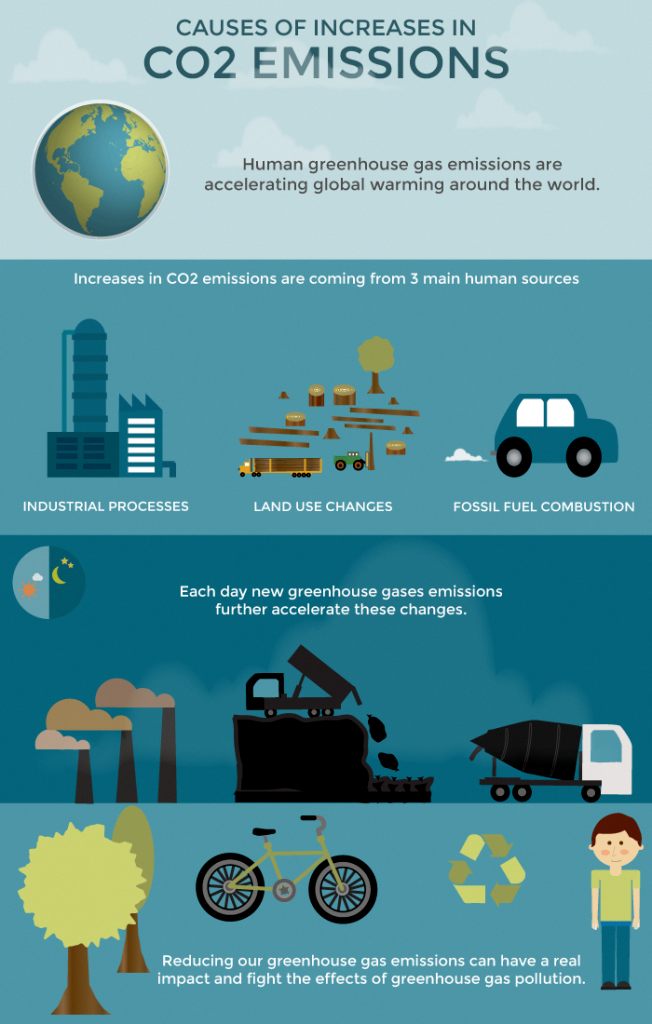

## Research Objective:

### To predict the green house gas emissions across EU from 1985 - 2017. How accurately can we predict the results for 2017 ?

## Data Analysis Process:

##  Step 1 : Data Collection and Data Profiling

### We retrieved dataset from "data.gov.ie" portal. This dataset contains information about green house gas emmissions from all countries within EU from 1985 - 2017. 

### Using Pandas we have imported csv file with 0.6 million records. 

In [ ]:
#importing packages such as pandas, pandas_profiling, pyplot

import pandas as pd                                       
import pandas_profiling
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
# Importing csv file into dataframe using pandas.

emmission_data = pd.read_csv('./Data/EU_GHG_Emmission_rate.csv',engine ='python')  
emmission_data

### Data Profiling

### Generating profile report of dataset using pandas_profiling class and ProfileReport method. From this report we can have an overall view of our data ie. number of records, number of variables, missing values, distribution of data for each variable, count of categorical and numerical variables, skewness in data.

In [ ]:
from pandas_profiling import ProfileReport            # importing pandas_profiling

report = ProfileReport(emmission_data,minimal=True)   
report.to_file(output_file= 'output.html')            # generating output file as a html output

In [ ]:
report                                              # displaying the profiling report in html format

## Step 2 : Data Exploration

In [ ]:
# Dropping rows where 'year' value is ambigous "1985-1987"

remove_year_8587 = emmission_data[emmission_data['Year']=='1985-1987']  # checking for year value '1985-1987'
emmission_data = emmission_data.drop(remove_year_8587.index,axis=0)     # dropping those rows where value is not specific year, instead it a range value(1985-1987)
emmission_data                                                          # displaying the dataset/dataframe after removal of ambiguous data

In [ ]:
emmission_data['Year'] = pd.to_numeric(emmission_data['Year'])  # Converting the year column which is string to numeric datatype

In [ ]:
# plotting scatter plot of year against emissions to identify if any pattern exists in the data

point_plot = emmission_data.plot.scatter(
     x='Year',
     y='emissions',
     c='Blue'
)

In [ ]:
# Code to find out top 5 pollutants in year 1985 and 2016
emmission_data_1985 = emmission_data[emmission_data['Year']== 1985]
emmission_data_2016 = emmission_data[emmission_data['Year']== 2016]

emissions_grouped_1985 = emmission_data_1985.groupby(['Year','Pollutant_name'])['emissions'].sum().reset_index()
major_emissions_1985 = emissions_grouped_1985 .nlargest(5,['emissions'])

emissions_grouped_2016 = emmission_data_2016.groupby(['Year','Pollutant_name'])['emissions'].sum().reset_index()
major_emissions_2016 = emissions_grouped_2016 .nlargest(5,['emissions'])

In [ ]:
# Function "emission_by_year_visual()" to generate bar plots for year 1985 and 2016 to visualize top 5 pollutants 
# in terms of emissions

import altair as alt                                # Altair for data visualization

def emission_by_year_visual():                      # Function definition
 

    Bar_plot_1985 = alt.Chart(major_emissions_1985, title = 'Type of pollutants in 1985 and 2016 and their highest emissions').mark_bar().encode(
  x = alt.X('Pollutant_name'),                      # Specifying x and y parameters for bar_plot
  y = 'emissions',

)

    text = Bar_plot_1985.mark_text(
  align = 'left',
  baseline = 'middle',
  dx = 3
)

    Bar_plot_2016 = alt.Chart(major_emissions_2016).mark_bar().encode(
  x = alt.X('Pollutant_name'),                      # Specifying x and y parameters for bar_plot
  y = 'emissions',

)

    text = Bar_plot_2016.mark_text(
  align = 'left',
  baseline = 'middle',
  dx = 3
)

    return (Bar_plot_1985 | Bar_plot_2016)          # Returning the graphs as output


In [ ]:
# Function call for "emission_by_year_visual"

emission_by_year_visual()                          # Displaying bar plots for year 1985 and 2016

### Preliminary insights :

####  From the above graphs we may be able to say that emissions for All greenhouse gases (CO2 equivalent) in 1985 was around 0.8 million Gg whereas in 2016 it spiked to around 12 million Gg. 

#### Also, we can observe that CO2, CH4, N20,HFC's and SF6 are crucial contributors in emission.

#### Thus, we can have more in-depth analysis on Pollutant name, year variables which are correlated to emissions.

## Step 3 : Data Preparation

## Data Cleaning

### Removing columns "PublicationDate", "DataSource", "Unit of Emission" and "Format_name", as in profiling report it can be observed that these variables have constant value for all records.

In [ ]:
emmission_data = emmission_data.drop(['PublicationDate','DataSource','Format_name','Unit'],axis=1)  # Dropping the columns
emmission_data                                                                                      # Displaying the dataframe

### Column "Sector_name" contains sector code and name of the sector combined, so spliting the sector name into another new column (feature engineering) as Upd_Sector_name and removing the column Sector_name

In [ ]:
emmission_data['Upd_Sector_name'] = emmission_data['Sector_name'].str.split("-",1,expand=True)[1]  # spliting sector name on "-" 


In [ ]:

emmission_data                            # displaying dataframe after creating new column Upd_Sector_name




In [ ]:
emmission_data = emmission_data.drop(['Sector_name'],axis=1)         # Dropping column Sector_name as it is redundant
emmission_data                                                       # Displaying dataframe

### Dropping column "Notation" as it has 63.6% (observed from data profiling report) missing values.

In [ ]:
emmission_data = emmission_data.drop(['Notation'],axis=1)         # Removing Notation column from dataframe
emmission_data                                                    # Displaying dataframe

## Data Transformation

### Categorical variables cannot be used for implementing regression algorithms.

### Performing encoding on categorical variables  "Pollutant_name","Country", "Upd_Sector_name" and  "Parent_sector_code" by converting to dummy variables using get_dummies method from pandas.

In [ ]:
emmission_data = pd.get_dummies(emmission_data,columns=['Pollutant_name','Country','Upd_Sector_name','Parent_sector_code'])
emmission_data                  # Displaying dataframe after converting to dummy variables.

### Checking correlation among few variables such as Pollutant_name, Year, Countries.

In [ ]:
corr_data = emmission_data.iloc[:,0:15].copy()             # Creating a subset of data with only 15 columns

corrmatrix = corr_data.corr()                              # Checking correlation among variables with corr() method
print(corrmatrix)                                          # Printing correlation matrix



### Visualizing the correlation matrix as heatmap

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrmatrix, annot=True)
plt.show()

#Inference:
# From the heatmap we can observe that selected variables are nearly uncorrelated with each other. 
# So we do not come across multicollinearity issue in the data.

## Step 4: Data Analysis (Model creation and Validation)


### Model 1: Multiple linear regression with random predictors.

###  A] Data splitting : Assigning four predictors(intuitionally) as independent variables and emissions as target variable. Then splitting the dataset into 70:30 ratio with training data (70%) and testing data (30%). Using "train_test_split" method from sklearn. 

### Feature Scaling: Normalizing target variable in the range 0 to 1


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm


emmission_data_selective = emmission_data[['Pollutant_name_All greenhouse gases - (CO2 equivalent)','Pollutant_name_CH4','Pollutant_name_CO2','Year']].copy()
X = emmission_data_selective.values.reshape(-1,4)
y = emmission_data['emissions'].values.reshape(-1,1)


# Normalizing target variable as it has wide range of values into range (0,1)
y = preprocessing.normalize(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    

### B] Model Training: Applying multiple linear regression with ordinary least squares algorithm on the training and test data. 

In [ ]:
linear_reg_model = sm.OLS(y_train, X_train).fit()   # Trained model

In [ ]:
print_model = linear_reg_model.summary()            # Checking regression results through model performance
print(print_model)

### C] Model evaluation: Predicting the emissions on test data

In [ ]:
y_pred = linear_reg_model.predict(X_test)               # evaluating the model on test data.

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # comparing the normalized actual values and predicted values
df.iloc[0:50,]

### D] Model Validation

### Validating the above multiple linear regression model using Mean Squared Error (MSE), R Squared value and Root Mean Squared Error(RMSE)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared value:',linear_reg_model.rsquared)

R_Squared=""
MSE = ""
R_Squared = R_Squared + str(round((linear_reg_model.rsquared),2))
MSE = MSE  + str(round((metrics.mean_squared_error(y_test, y_pred)),2))
print(R_Squared)
print(MSE)

### From above model performance metrics it can be inferred that R2 value is 0.52 which tells us that the model is not performing very good in predictions. Hence we will create next model with added features from dataset.

### Model 2:  Multiple linear regression with feature selection

### A] Feature Selection : Performing Feature selection based on F test scores and selecting features with high scores for model building.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



emmission_data_upd_filter = emmission_data.iloc[:,4:43].copy()    # Subsetting dataset of first 43 columns,as appylying on all features(264) gives memory error
X = emmission_data_upd_filter.values.reshape(-1,39)
y = emmission_data['emissions'].values.reshape(-1,1)

y = preprocessing.normalize(y)                                        # normalizing y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

bestfeatures = SelectKBest(score_func=f_regression, k=20)             # selecting k best features using f test scores
fit = bestfeatures.fit(X_train,y_train)



In [ ]:
dfscores = pd.DataFrame(fit.scores_)                  # creating dataframe of scores 
dfscores.nlargest(10,0)                               # top 10 highest scoring features among 43 selected features
filtered_columns = list(emmission_data_upd_filter.columns)       # list of all selected columns 
df_columns = pd.DataFrame(filtered_columns)                      # converting into dataframe

In [ ]:
featureScores = pd.concat([df_columns,dfscores],axis=1)             # merging two dataframes 
featureScores.columns = ['Selected_features','Score']               # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))                           # Displaying top 10 features of dataset from selected first 43 columns

### Repeated the above procedure for all 264 columns of dataset batchwise and selected 61 columns for model building . 
### Note: Looping all 264 columns was throwing a memory error hence extracted the selected columns batchwise

###  B] Data splitting : Assigning 61 predictors(selected) as independent variables and emissions as target variable. Then splitting the dataset into 70:30 ratio with training data (70%) and testing data (30%). Using "train_test_split" method from sklearn.

### Feature Scaling: Normalizing target variable in the range 0 to 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import statsmodels.api as sm

#selecting 61 columns identified with high scores from above feature selection process
emmission_data_selective = emmission_data[['Pollutant_name_All greenhouse gases - (CO2 equivalent)','Pollutant_name_Unspecified mix of HFCs and PFCs - (CO2 equivalent)','Pollutant_name_NF3 - (CO2 equivalent)','Country_Liechtenstein','Country_EU28 (Convention)','Country_EU (KP)','Pollutant_name_PFCs - (CO2 equivalent)','Pollutant_name_N2O','Country_Malta','Pollutant_name_SF6 - (CO2 equivalent)','Year','Upd_Sector_name_ Energy Industries','Upd_Sector_name_ Fluorochemical Production','Upd_Sector_name_ Agriculture/Forestry/Fishing','Upd_Sector_name_ Energy','Upd_Sector_name_ Agriculture','Upd_Sector_name_ Domestic Aviation','Upd_Sector_name_ Cars','Upd_Sector_name_ Commercial/Institutional','Upd_Sector_name_ Deep Water','Upd_Sector_name_ Domestic wastewater','Upd_Sector_name_ Harvested Wood Products','Upd_Sector_name_ Land converted to forest land','Upd_Sector_name_ Forest Land remaining forest land','Upd_Sector_name_ Forest Land','Upd_Sector_name_ Fuel Combustion - Sectoral approach','Upd_Sector_name_ Manufacturing Industries and Construction','Upd_Sector_name_ International Aviation','Upd_Sector_name_ International Bunkers','Upd_Sector_name_ Land converted to grassland','Upd_Sector_name_ Other Sector','Upd_Sector_name_ Other Metal Industry','Upd_Sector_name_ Other chemical industry','Upd_Sector_name_ Other electronics industry','Upd_Sector_name_ Multilateral Operations','Upd_Sector_name_ Prescribed Burning of Savannas','Upd_Sector_name_ Other agriculture emissions','Upd_Sector_name_ Other LULUCF','Upd_Sector_name_ Road Transportation','Upd_Sector_name_ Transport','Upd_Sector_name_ TFT Flat Panel Display','Upd_Sector_name_ Uncategorized Waste Disposal Sites','Upd_Sector_name_ Settlements remaining settlements','Upd_Sector_name_ Waste management','Upd_Sector_name_ Sugar cane','Upd_Sector_name_ Wastewater Treatment and Discharge','Parent_sector_code_1.A.2','Parent_sector_code_2.E','Parent_sector_code_1.AA','Parent_sector_code_3.B','Parent_sector_code_2.B','Parent_sector_code_4.A','Parent_sector_code_3.F','Parent_sector_code_4','Parent_sector_code_4.F','Parent_sector_code_4.C','Parent_sector_code_3.D','Parent_sector_code_4.E','Parent_sector_code_4.D','Parent_sector_code_5.A','Parent_sector_code_4.B']].copy()
X = emmission_data_selective.values.reshape(-1,61)
y = emmission_data['emissions'].values.reshape(-1,1)
#scaler = MinMaxScaler(feature_range=(0,1))


#y = scaler.fit_transform(emmission_data['emissions'].values.reshape(-1, 1))
y = preprocessing.normalize(y)


X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X, y, test_size=0.3, random_state=0)


### C] Model Training: Applying multiple linear regression with ordinary least squares algorithm on the training and test data consisting of selective features

In [ ]:
import statsmodels.api as sm

lnr_model = sm.OLS(y_train_sel, X_train_sel).fit()         # Trained model


In [ ]:
print_model = lnr_model.summary()               # Checking regression results through model performance statistics
print(print_model)

### D] Model evaluation: Predicting the emissions on test data

In [ ]:
y_pred_lnr = lnr_model.predict(X_test_sel)              # evaluating model on test data


In [ ]:

df = pd.DataFrame({'Actual': y_test_sel.flatten(), 'Predicted': y_pred_lnr.flatten()}) # comparing the normalized actual values and predicted values
df.iloc[:50,]

### E] Model Validation

### Validating the above multiple linear regression model using Mean Squared Error (MSE), R Squared value and Root Mean Squared Error(RMSE)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sel, y_pred_lnr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sel, y_pred_lnr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sel, y_pred_lnr)))
print('R squared value:',lnr_model.rsquared)

R_Squared = R_Squared +"," + str(round((lnr_model.rsquared),2))
R_Squared
MSE = MSE  +"," + str(round((metrics.mean_squared_error(y_test_sel, y_pred_lnr)),2))
print(MSE)

### From above model performance metrics it can be inferred that R2 value is 0.67 which tells us that the model is performing better than linear model with few random features in terms of predictions. Also, it can observed that model is predicting emissions mostly correctly as per actual values. 

### In terms of Mean squared error, it is closer to 0 (0.19) which is expected for a good fit model.

### Model 3: Ridge Linear regression

### A] Model Training: Applying ridge linear regression algorithm on the training and test data consisting of selective features as above 

In [ ]:
from sklearn.linear_model import Ridge

ml_ridge_regressor = Ridge(alpha=1,solver="cholesky")  

ml_ridge_regressor.fit(X_train_sel,y_train_sel)



### B] Model evaluation: Predicting the emissions on test data

In [ ]:
y_ridge_pred = ml_ridge_regressor.predict(X_test_sel)

In [ ]:
df = pd.DataFrame({'Actual': y_test_sel.flatten(), 'Predicted': y_ridge_pred.flatten()}) # comparing the normalized actual values and predicted values
df.iloc[51:100,]

### C] Model Validation

### Validating the above ridge linear regression model using Mean Squared Error (MSE), R Squared value and Root Mean Squared Error(RMSE)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sel, y_ridge_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sel, y_ridge_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sel, y_ridge_pred)))
print('R Squared Error:', r2_score(y_test_sel,y_ridge_pred))

R_Squared = R_Squared +"," + str(round((r2_score(y_test_sel,y_ridge_pred)),2))
R_Squared
MSE = MSE  +"," + str(round((metrics.mean_squared_error(y_test_sel, y_ridge_pred)),2))

### It can be inferred from ridge regression model performance metrics that R2 value is 0.32 which is lower than multiple regression R2 value. 

### Whereas in terms of Mean squared error the value is same as multiple linear regression model. So we may prefer Multiple linear regression model over Ridge regression.

### Model 4: Decision tree regressor

### A] Model Training: Applying decision tree regression algorithm on the training and test data consisting of selective features as above

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)              # applying decision tree regressor from sklearn tree class


In [ ]:
regressor.fit(X_train_sel,y_train_sel)                       # training the model on training data

### B] Model Evaluation: Predicting the emissions on test data 

In [ ]:
y_tree_pred = regressor.predict(X_test_sel)

In [ ]:
df = pd.DataFrame({'Actual': y_test_sel.flatten(), 'Predicted': y_tree_pred.flatten()}) # comparing the normalized actual values and predicted values
df.iloc[100:150,]

### C] Model Validation

### Validating the above decision tree  regression model using Mean Squared Error (MSE), R Squared value and Root Mean Squared Error(RMSE)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sel, y_tree_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sel, y_tree_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sel, y_tree_pred)))
print('R Squared Error:', r2_score(y_test_sel,y_tree_pred))

R_Squared = R_Squared +"," + str(round(r2_score(y_test_sel,y_tree_pred),2))
R_Squared
MSE = MSE  +"," + str(round((metrics.mean_squared_error(y_test_sel, y_tree_pred)),2))
print(MSE)

### Model 5: Random forest regressor

### A] Model Training: Applying random forest regression algorithm on the training and test data consisting of selective features as above

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rnf_regressor = RandomForestRegressor(max_depth=80,random_state=0)  # applying random forest regressor from sklearn ensemble class
                                                                    # with max depth of each tree as 80

In [ ]:
rnf_regressor.fit(X_train_sel,y_train_sel.ravel())                          # training model on train data

### B] Model Evaluation: Predicting the emissions on test data

In [ ]:
y_rf_pred = rnf_regressor.predict(X_test_sel)

In [ ]:
df = pd.DataFrame({'Actual': y_test_sel.flatten(), 'Predicted': y_rf_pred.flatten()}) # comparing the normalized actual values and predicted values
df.iloc[150:200,]

### C] Model Validation


### Validating the above decision tree regression model using Mean Squared Error (MSE), R Squared value and Root Mean Squared Error(RMSE)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sel, y_rf_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sel, y_rf_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sel, y_rf_pred)))
print('R Squared Error:', r2_score(y_test_sel,y_rf_pred))

R_Squared = R_Squared +"," + str(round(r2_score(y_test_sel,y_rf_pred),2))
R_Squared
MSE = MSE  +"," + str(round((metrics.mean_squared_error(y_test_sel, y_rf_pred)),2))

In [ ]:
#plt.scatter(X_test, y_test,  color='gray')
#plt.plot(X_test, y_pred, color='red', linewidth=2)
#plt.show()

## Analysis and Findings:

In [ ]:
models_list = ['Linear_reg_random_predictors','Linear_reg_selective_predictors','Ridge_linear_regression','Decision_tree_regression','Random_forest_regression']
R_Squared

Compare_df = pd.DataFrame()
Compare_df['Models'] = models_list
R_Squared_vales = R_Squared.split(',')
R_Squared_vales
MSE_vales = MSE.split(',')
MSE_vales


In [ ]:
Compare_df['R-Squared']= pd.to_numeric(R_Squared_vales)
Compare_df['MSE']= pd.to_numeric(MSE_vales)

Compare_df

In [ ]:
import altair as alt

Bar_plot_model_performance = alt.Chart(Compare_df, title = 'Model performance as per R squared value').mark_bar().encode(
  x = alt.X('Models'),                      # Specifying x and y parameters for bar_plot
  y = 'R-Squared',
  color= "Models"

)
Bar_plot_model_performance_MSE = alt.Chart(Compare_df, title = 'Model performance as per Mean Squared Error').mark_bar().encode(
  x = alt.X('Models'),                      # Specifying x and y parameters for bar_plot
  y = 'MSE',
  color= "Models"

)

text = Bar_plot_model_performance .mark_text(
align = 'left',
baseline = 'middle',
dx = 3
)
Bar_plot_model_performance|Bar_plot_model_performance_MSE

### From above graphs we can observe that as per R-squared metric, performance of Multiple Linear regression with selective predictors model is highest and in terms of Mean Squared errors the lowest MSE( close to 0) is for Decision tree model. Hence we can say that Multiple Linear regression algorithm has outperformed over other regression algorithms. Also, decision tree algorithm has good performance as compared to Ridge linear regression and Linear regrerssion with random predictors.

### Computational Complexity:

     1. Multiple Linear Regression: O(n2) - "n" is number of features.This states that if we double the number of features then the computational time also increases by 2^2 times the original.But even with large dataset we can implement Linear regression easily as the equation we consider here is linear.
     
     2. Decision Tree Regression: O(mnLogn)- "m" is number of features and "n" is number of records. This time complexity is less than linear regression as there is no exponential order in the formula.
     
     3. Random Forest Regression: O(ntrees*mnlogn): -"ntrees" is number of trees in random forest, "m" is number of features and "n" is number of records. Random forest computational time is higher than decision tree as we multiply each tree's run time together. 
    
    

### As per above results we can say that the good fit model for our data is the Multiple linear regression with selective features. Hence the data seems to have linear relationship among features and target variable.

### So now we will predict the green house gas emissions for particular year 2017 using Multiple Linear Regression with selective features model

In [ ]:
# subsetting only 2017 data to check the accuracy of linear model with selective features 

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import statsmodels.api as sm

#selecting 61 columns identified with high scores from above feature selection process
emmission_data_2017 = emmission_data[emmission_data['Year']== 2017]     
emmission_data_selective = emmission_data_2017[['Pollutant_name_All greenhouse gases - (CO2 equivalent)','Pollutant_name_Unspecified mix of HFCs and PFCs - (CO2 equivalent)','Pollutant_name_NF3 - (CO2 equivalent)','Country_Liechtenstein','Country_EU28 (Convention)','Country_EU (KP)','Pollutant_name_PFCs - (CO2 equivalent)','Pollutant_name_N2O','Country_Malta','Pollutant_name_SF6 - (CO2 equivalent)','Year','Upd_Sector_name_ Energy Industries','Upd_Sector_name_ Fluorochemical Production','Upd_Sector_name_ Agriculture/Forestry/Fishing','Upd_Sector_name_ Energy','Upd_Sector_name_ Agriculture','Upd_Sector_name_ Domestic Aviation','Upd_Sector_name_ Cars','Upd_Sector_name_ Commercial/Institutional','Upd_Sector_name_ Deep Water','Upd_Sector_name_ Domestic wastewater','Upd_Sector_name_ Harvested Wood Products','Upd_Sector_name_ Land converted to forest land','Upd_Sector_name_ Forest Land remaining forest land','Upd_Sector_name_ Forest Land','Upd_Sector_name_ Fuel Combustion - Sectoral approach','Upd_Sector_name_ Manufacturing Industries and Construction','Upd_Sector_name_ International Aviation','Upd_Sector_name_ International Bunkers','Upd_Sector_name_ Land converted to grassland','Upd_Sector_name_ Other Sector','Upd_Sector_name_ Other Metal Industry','Upd_Sector_name_ Other chemical industry','Upd_Sector_name_ Other electronics industry','Upd_Sector_name_ Multilateral Operations','Upd_Sector_name_ Prescribed Burning of Savannas','Upd_Sector_name_ Other agriculture emissions','Upd_Sector_name_ Other LULUCF','Upd_Sector_name_ Road Transportation','Upd_Sector_name_ Transport','Upd_Sector_name_ TFT Flat Panel Display','Upd_Sector_name_ Uncategorized Waste Disposal Sites','Upd_Sector_name_ Settlements remaining settlements','Upd_Sector_name_ Waste management','Upd_Sector_name_ Sugar cane','Upd_Sector_name_ Wastewater Treatment and Discharge','Parent_sector_code_1.A.2','Parent_sector_code_2.E','Parent_sector_code_1.AA','Parent_sector_code_3.B','Parent_sector_code_2.B','Parent_sector_code_4.A','Parent_sector_code_3.F','Parent_sector_code_4','Parent_sector_code_4.F','Parent_sector_code_4.C','Parent_sector_code_3.D','Parent_sector_code_4.E','Parent_sector_code_4.D','Parent_sector_code_5.A','Parent_sector_code_4.B']].copy()
X = emmission_data_selective.values.reshape(-1,61)
y = emmission_data_2017['emissions'].values.reshape(-1,1)
#scaler = MinMaxScaler(feature_range=(0,1))


#y = scaler.fit_transform(emmission_data['emissions'].values.reshape(-1, 1))
y = preprocessing.normalize(y)

In [ ]:
import statsmodels.api as sm

lnr_model_2017 = sm.OLS(y, X).fit() 

y_pred_lnr = lnr_model_2017.predict(X)              # evaluating model on test data

df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred_lnr.flatten()}) # comparing the normalized actual values and predicted values
df_1 = df.iloc[:1000,]
df_1

In [ ]:
Scatter_Plot = alt.Chart(df_1, title = 'Model accuracy').mark_point().encode(
  x = alt.X('Actual'),                      # Specifying x and y parameters for scatter plot
  y = 'Predicted',
  color= alt.value('green')

)
Scatter_Plot

### After comparing actual and predicted values we achieve an accuracy rate of 67% for prediction of green house gas emission for the year 2017.

## Conclusion and Insights for Business Users:

### We can conclude from the model that the green house gas emission is mainly affected due to following components:

      1. Pollutants: Unspecified mix of HFC's(Hydro Fluro Carbon's) and PFC's, CO2(Carbon Dioxide), N2O(Nitrous Oxide) and CH4(Methane).
      2. Sectors: Energy_industries, Flurochemical production, Domestic and International Aviation,Agriculture,Harvested Wood Products, Fuel Combustion, Manufacturing Industries and Metal Industry.
      
### Also, it shows a trend of less emissions in EU over past 10 years as compared to 1990's